# 텍스트 데이터 탐색

## 명사 추출된 데이터 불러오기

In [17]:
import pandas as pd
import ast

df = pd.read_csv('./data/df_all_preprocessed_noun.csv', sep=',', quoting=1)
df['nouns'] = df['nouns'].apply(lambda x: ast.literal_eval(x))

In [18]:
df.sample()

,url,press,title,datetime,text,label,nouns
10108,https://www.ohmynews.com/NWS_Web/View/at_pg.as...,오마이뉴스,"""헌법재판소에서도 말장난, 윤석열 파면해야""",2025-01-24 11:03:00+09:00,큰사진보기 ▲충남 당진시민들이 윤석열 탄핵 촉구 집회를 벌이고 있다. ⓒ 김진숙 관...,윤석열,"[사진, 충남, 당진, 시민, 윤석열, 탄핵, 촉구, 집회, 김진숙, 관련, 사진,..."


## Term Frequency 세기

In [19]:
from collections import Counter
from itertools import chain

noun_list_flat = chain(*df['nouns'])
# print(noun_list_flat[:3])
count_dict = Counter(noun_list_flat)
count_dict

Counter({'대통령': 81661,
         '것': 77897,
         '대표': 64369,
         '일': 60575,
         '윤석열': 42116,
         '국민': 41516,
         '탄핵': 41057,
         '윤': 34156,
         '이': 33143,
         '수': 30802,
         '이재명': 29186,
         '의원': 26851,
         '민주당': 26406,
         '등': 25047,
         '힘': 24811,
         '말': 23876,
         '국회': 22039,
         '기자': 20557,
         '거': 19639,
         '내란': 19636,
         '헌법': 17473,
         '월': 16974,
         '정치': 16227,
         '서울': 16155,
         '년': 16061,
         '더불어민주당': 15531,
         '조사': 14709,
         '심판': 14698,
         '명': 14233,
         '체포': 14128,
         '대선': 13265,
         '구속': 13156,
         '주장': 13043,
         '관련': 12745,
         '수사': 12213,
         '검찰': 12050,
         '헌재': 11876,
         '우리': 11367,
         '선고': 11247,
         '영장': 11109,
         '사진': 10658,
         '당': 10631,
         '때': 10434,
         '그': 10383,
         '상황': 10251,
         '생각': 10

In [20]:
count_dict.most_common(30)

[('대통령', 81661),
 ('것', 77897),
 ('대표', 64369),
 ('일', 60575),
 ('윤석열', 42116),
 ('국민', 41516),
 ('탄핵', 41057),
 ('윤', 34156),
 ('이', 33143),
 ('수', 30802),
 ('이재명', 29186),
 ('의원', 26851),
 ('민주당', 26406),
 ('등', 25047),
 ('힘', 24811),
 ('말', 23876),
 ('국회', 22039),
 ('기자', 20557),
 ('거', 19639),
 ('내란', 19636),
 ('헌법', 17473),
 ('월', 16974),
 ('정치', 16227),
 ('서울', 16155),
 ('년', 16061),
 ('더불어민주당', 15531),
 ('조사', 14709),
 ('심판', 14698),
 ('명', 14233),
 ('체포', 14128)]

# Term frequency 시각화

In [21]:
count_dict_sorted = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)

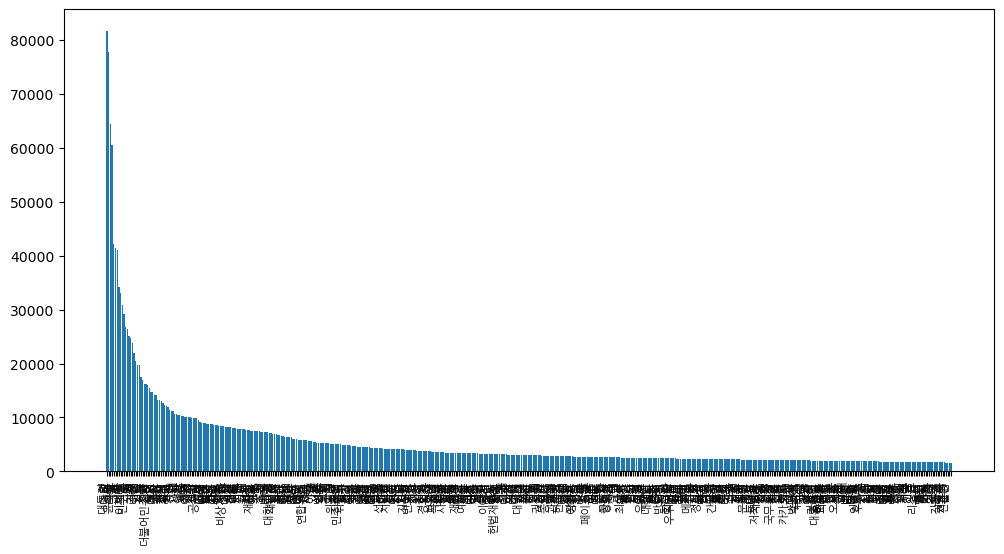

In [33]:
import matplotlib.pyplot as plt

words, counts = list(zip(*count_dict_sorted[:500]))

plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(words, ha='right', rotation=90, fontname='NanumGothic', fontsize=8)
plt.show()

### 길이가 1인 명사 확인 

In [5]:
for k, v in count_dict_sorted[:30]:
    if len(k) == 1:
        print(k, v)

것 77897
일 60575
윤 34156
이 33143
수 30802
등 25047
힘 24811
말 23876
거 19639
월 16974
년 16061
명 14233


# Wordcloud 시각화

In [34]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

뉴스 데이터 전체로 그려보기

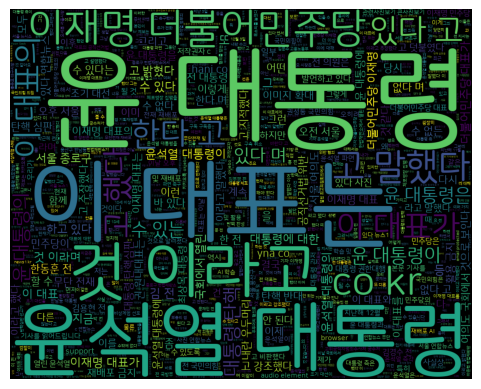

In [ ]:
corpus = df['text']

text = ' '.join(corpus) # all text documents in one string
wc = WordCloud(font_path='NanumSquareRoundR.ttf', width=1000, height=800, max_words=1000).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [50]:
def draw_wordcloud(corpus):
    """
    corpus: list of text or words
    """
    text = ' '.join(corpus) # all nouns in one string
    wc = WordCloud(font_path='NanumSquareRoundR.ttf', width=1000, height=800, max_words=1000).generate(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

명사만 사용해서 그려보기

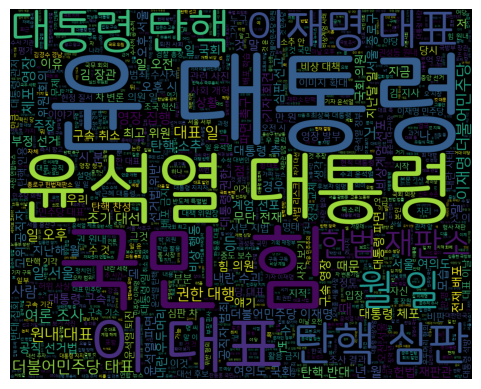

In [38]:
corpus = chain(*df['nouns']) # list of all nouns

draw_wordcloud(corpus)

길이 1인 명사 제거하고 그려보기

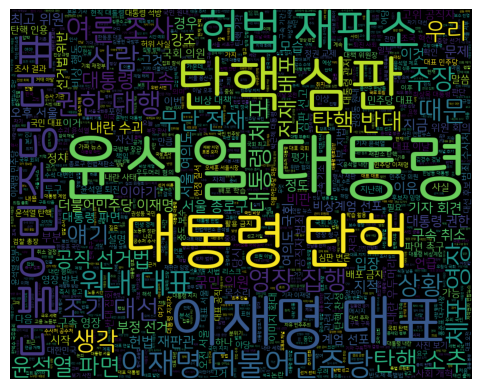

In [40]:
corpus = chain(*df['nouns']) # list of all nouns
corpus = [noun for noun in corpus if len(noun) > 1] # remove nouns with length 1

draw_wordcloud(corpus)

길이 1인 명사, stopword 제거하고 그려보기

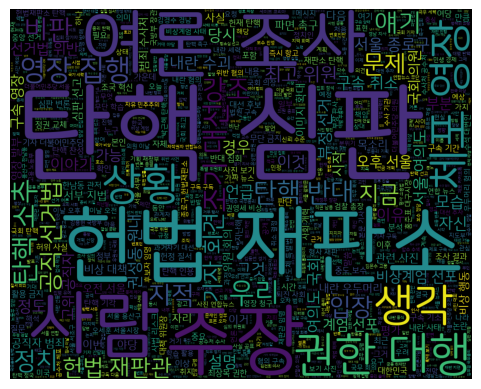

In [54]:
corpus = chain(*df['nouns']) # list of all nouns
corpus = [noun for noun in corpus if len(noun) > 1] # remove nouns with length 1

stopwords = ['이재명', '대표', '윤석열', '대통령', '더불어민주당', '민주당', '국민의힘', '국민', '전재', '배포', '때문']

corpus = [noun for noun in corpus if noun not in stopwords]

draw_wordcloud(corpus)

이재명 / 윤석열 뉴스만 추려서 각각 그려보기

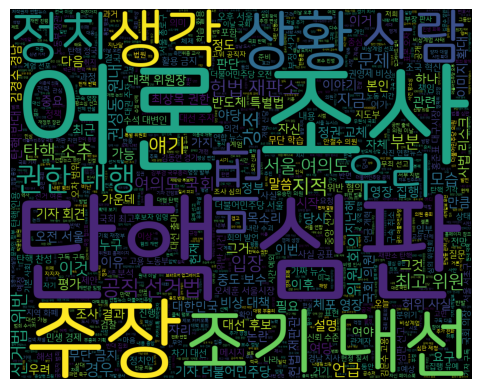

In [55]:
# 이재명
corpus = chain(*df.loc[df.label == '이재명', 'nouns']) # list of all nouns
corpus = [noun for noun in corpus if len(noun) > 1 and noun not in stopwords]

draw_wordcloud(corpus)

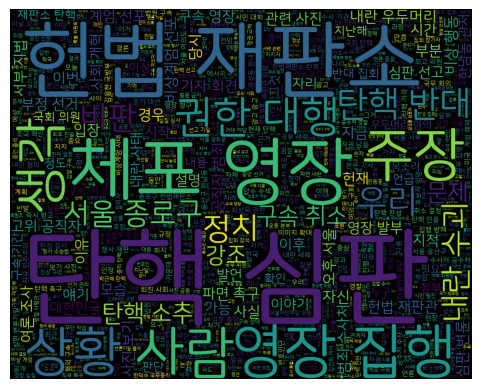

In [56]:
# 윤석열
corpus = chain(*df.loc[df.label == '윤석열', 'nouns']) # list of all nouns
corpus = [noun for noun in corpus if len(noun) > 1 and noun not in stopwords]

draw_wordcloud(corpus)